---
# Data Science and Artificial Intelliegence Practicum
## 6-modul. Deep Learning
---

## **6.4 - MNIST Digits Classification**

In [ ]:
# !pip3 install torch torchvision fastai

In [2]:
import torch
import fastai

# check versions
print(f"{torch.__version__=}")
print(f"{fastai.__version__=}")

# check if the GPU is working
torch.cuda.is_available()

torch.__version__='2.0.0+cu118'
fastai.__version__='2.7.12'


True

- **[MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database)** - (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

![MnistExamples.png](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

### **Classification of `3` or `7` handwritten digit image with *arrays/tensors*.**

In [ ]:
from fastai.vision.all import *

# dataset path
path = untar_data(URLs.MNIST_SAMPLE)

# image paths
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

print(threes[:5])
print(sevens[:5])

[Path('/root/.fastai/data/mnist_sample/train/3/10.png'), Path('/root/.fastai/data/mnist_sample/train/3/10000.png'), Path('/root/.fastai/data/mnist_sample/train/3/10011.png'), Path('/root/.fastai/data/mnist_sample/train/3/10031.png'), Path('/root/.fastai/data/mnist_sample/train/3/10034.png')]
[Path('/root/.fastai/data/mnist_sample/train/7/10002.png'), Path('/root/.fastai/data/mnist_sample/train/7/1001.png'), Path('/root/.fastai/data/mnist_sample/train/7/10014.png'), Path('/root/.fastai/data/mnist_sample/train/7/10019.png'), Path('/root/.fastai/data/mnist_sample/train/7/10039.png')]


In [ ]:
im3_sample = threes[1]
im3 = Image.open(im3_sample)
im3

In [ ]:
im7_sample = sevens[0]
im7 = Image.open(im7_sample)
im7

In [ ]:
# Convert image to numbers
array(im3)  # numpy array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254,
        255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
tensor(im3)  # torch tensor

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255,
         254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  4

In [ ]:
import pandas as pd

df = pd.DataFrame(tensor(im3))
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


#### Pixel Similarity

In [ ]:
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]

len(three_tensors), len(seven_tensors)

(6131, 6265)

In [ ]:
seven_tensors[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

<Axes: >

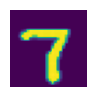

In [ ]:
show_image(seven_tensors[0])

#### We need **stacking** in order to calculate tensors:

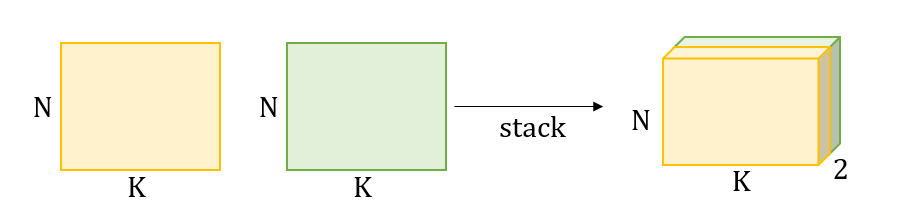

In [ ]:
stack_threes = torch.stack(three_tensors).float()/255
stack_sevens = torch.stack(seven_tensors).float()/255

(stack_threes.shape), (stack_sevens.shape)

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

<Axes: >

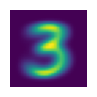

In [ ]:
mean3 = stack_threes.mean(0)
show_image(mean3)

<Axes: >

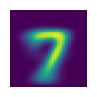

In [ ]:
mean7 = stack_sevens.mean(0)
show_image(mean7)

#### Measuring Errors
- `MAE` - Mean absolute error or `L1 norm`
- `RMSE` - Root mean square error or `L2 norm`

<Axes: >

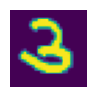

In [ ]:
s_3 = stack_threes[5]
show_image(s_3)

In [ ]:
# MAE
mae = (s_3 - mean3).abs().mean()

# RMSE
rmse = ((s_3 - mean3)**2).mean().sqrt()

print(f"{mae=}")
print(f"{rmse=}")

mae=tensor(0.1700)
rmse=tensor(0.3016)


In [ ]:
# MAE
mae = (s_3 - mean7).abs().mean()

# RMSE
rmse = ((s_3 - mean7)**2).mean().sqrt()

print(f"{mae=}")
print(f"{rmse=}")

mae=tensor(0.2198)
rmse=tensor(0.3829)


**In conclusion, we can say that the error of `sample 3` with `mean3` is smaller than that of mean7, which means that it is close to `3`.**

#### **Validation**

In [ ]:
data = [[1, 2, 3], [4, 5, 6]]  # nested list
arr = array(data)  # numpy array
tns = tensor(data)  # torch tensor

In [ ]:
data

[[1, 2, 3], [4, 5, 6]]

In [ ]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
valid_3_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
def mae(a, b):
  """Calculate mean absolute error"""
  return (a-b).abs().mean((-1, -2))

# def rmse(a, b):
#   """Calculate root mean square error"""
#   return ((a - b)**2).mean().sqrt()


valid_3_errors = mae(valid_3_tens, mean3)
valid_7_errors = mae(valid_7_tens, mean7)

valid_3_errors, valid_3_errors.shape

(tensor([0.1321, 0.1214, 0.1445,  ..., 0.1573, 0.1450, 0.1137]),
 torch.Size([1010]))

**Determining model accuracy by broadcasting**

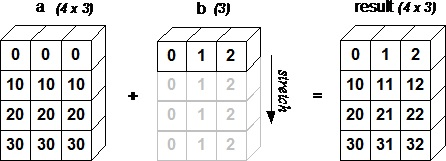

In [ ]:
def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)

is_3(s_3), is_3(s_3).float()

(tensor(True), tensor(1.))

In [ ]:
accuracy_3 = is_3(valid_3_tens).float().mean()
accuracy_7 = is_7(valid_7_tens).float().mean()

accuracy_3, accuracy_7, (accuracy_3+accuracy_7)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

### **Classification of `3` or `7` handwritten digit image with *neural networks*.**

- **Gradient Descent** - an optimization algorithm which is commonly-used to train machine learning models and neural networks.

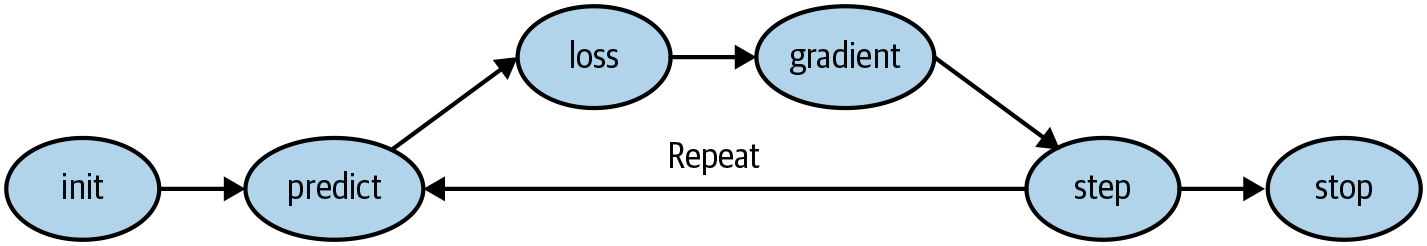

In [4]:
w_t = torch.tensor(3., requires_grad=True)
w_t

tensor(3., requires_grad=True)

In [5]:
def loss(w):
  return w**2

loss_v = loss(w_t)
loss_v

tensor(9., grad_fn=<PowBackward0>)

In [6]:
# Calculating gradient
loss_v.backward()

Loss function: `w**2`, derivative of this function: `2*w`.

In [7]:
w_t.grad

tensor(6.)

**Step with learning rate**:
- `w = w + lr * w.grad` or `w = w - lr * w.grad`